In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
print("Number of missing values in training set:", sum(data.isnull().sum()))
data=data.dropna()

Number of missing values in training set: 0


In [4]:
print("Number of missing values in training set:", sum(data.isnull().sum()))

Number of missing values in training set: 0


In [5]:
target = data[["target"]].copy()
data = data.drop(["id","target"], axis=1)
data.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [6]:
target['target'] = target['target'].str.replace('Class_', '')
target['target'] = pd.to_numeric(target['target'], errors='coerce')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(49502, 93)
(49502, 1)
(12376, 93)
(12376, 1)


In [8]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

mlp = MLPClassifier()
mlp.fit(x_train,y_train)
pred_mlp = mlp.predict(x_test)
accuracy_score(y_test, pred_mlp)

C:\Users\Win7\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7882191338073691

In [9]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
accuracy_score(y_test, pred_knn)

0.7807045895281189

In [10]:
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
accuracy_score(y_test, pred_svc)

0.7677763413057531

In [11]:
r_forest = RandomForestClassifier(n_estimators=50,n_jobs=-1)
r_forest.fit(x_train,y_train)
pred_r_forest = r_forest.predict(x_test)
accuracy_score(y_test, pred_r_forest)

0.8087427278603749

In [12]:
xgb = XGBClassifier(num_class = 9,objective="multi:softprob",eval_metric="mlogloss")
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy_score(y_test, pred_xgb)


0.7722204266321914

In [13]:
# It is not possible to plot ROC curve as it doesn't support multiclass calssification

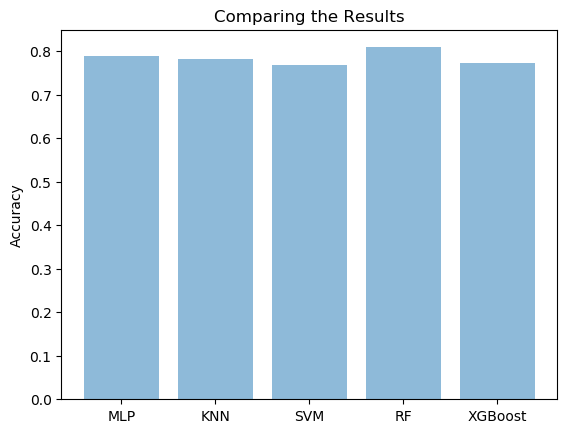

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('MLP', 'KNN', 'SVM', 'RF', 'XGBoost')
y_pos = np.arange(len(objects))
performance = [accuracy_score(y_test, pred_mlp),accuracy_score(y_test, pred_knn),accuracy_score(y_test, pred_svc),accuracy_score(y_test, pred_r_forest),accuracy_score(y_test, pred_xgb)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Comparing the Results')

plt.show()